In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 로드
data = pd.read_csv("C:\\multi_final\\data\\2022년_latest.csv")

In [13]:
# 'datetime' 컬럼을 datetime 객체로 변환
data['datetime'] = pd.to_datetime(data['datetime'])

# 월 단위로 datetime 변환
data['month'] = data['datetime'].dt.to_period('M')


In [14]:
# 필요한 컬럼만 선택
data = data[['datetime', 'ID', 'y', 'month']]

In [15]:
data

,datetime,ID,y,month
0,2022-01-01 00:00:00,1124,3,2022-01
1,2022-01-01 01:00:00,1124,4,2022-01
2,2022-01-01 02:00:00,1124,3,2022-01
3,2022-01-01 03:00:00,1124,3,2022-01
4,2022-01-01 04:00:00,1124,3,2022-01
...,...,...,...,...
78685,2022-12-31 19:00:00,3798,16,2022-12
78686,2022-12-31 20:00:00,3798,14,2022-12
78687,2022-12-31 21:00:00,3798,16,2022-12
78688,2022-12-31 22:00:00,3798,15,2022-12


In [16]:
# ID와 월별로 그룹화하여 y의 평균 계산
monthly_data = data.groupby(['ID', 'month'])['y'].mean().reset_index()

In [17]:
monthly_data

,ID,month,y
0,1124,2022-01,6.389785
1,1124,2022-02,6.075893
2,1124,2022-03,3.888889
3,1124,2022-04,8.226190
4,1124,2022-05,14.024194
...,...,...,...
115,3798,2022-08,30.407258
116,3798,2022-09,37.102778
117,3798,2022-10,54.059140
118,3798,2022-11,27.225627


In [18]:
# 선택한 정류소 ID 목록
selected_ids = [1124, 1153, 1158, 1160, 1166, 2701, 2715, 2721, 2728, 3798]

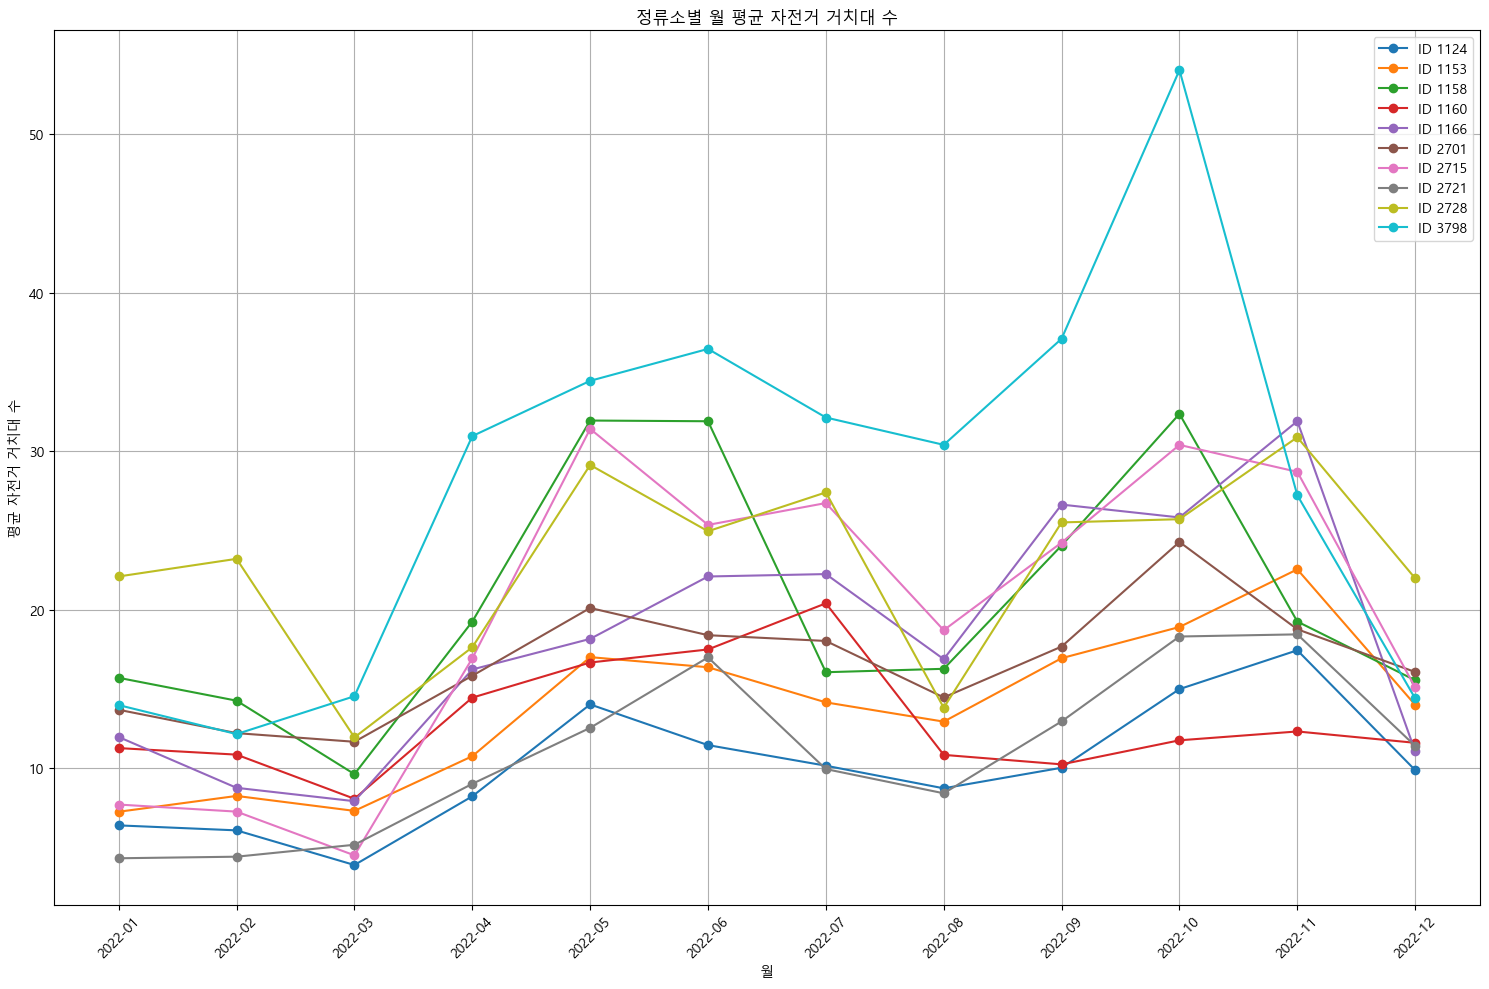

In [21]:
# 그래프 설정
plt.figure(figsize=(15, 10))
plt.rc('font', family="Malgun Gothic")

# 각 정류소별로 반복하여 그래프 그리기
for id in selected_ids:
    # 현재 정류소의 월별 평균 데이터 선택
    temp_data = monthly_data[monthly_data['ID'] == id]
    # 그래프 그리기
    plt.plot(temp_data['month'].astype(str), temp_data['y'], marker='o', linestyle='-', label=f'ID {id}')
# 범례 표시
plt.legend()
# x축 레이블
plt.xlabel('월')
# y축 레이블
plt.ylabel('평균 자전거 거치대 수')
# 그래프 제목
plt.title('정류소별 월 평균 자전거 거치대 수')
# x축 눈금 레이블 회전
plt.xticks(rotation=45)
# 그리드 추가
plt.grid(True)
# 그래프 표시
plt.tight_layout()
plt.show()
